In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'errorbar.capsize': 2})
import numpy as np
import root_to_pandas

# Open Data

In [2]:
READ_PATH = 'test_data/'

List of the histogram names and the corresponding stored histograms.

In [3]:
file = uproot.open(READ_PATH+'LArPulseTest.root')
file_unweighted = uproot.open(READ_PATH+'LArPulseTestNoWeight.root')
histo_list = dict(file.classes())
histo_list

{b'hwid_126604;1': uproot.rootio.TProfile,
 b'hwid_151685;1': uproot.rootio.TProfile,
 b'hwid_200164;1': uproot.rootio.TProfile,
 b'hwid_61040;1': uproot.rootio.TProfile,
 b'hwid_7791;1': uproot.rootio.TProfile,
 b'hwid_9670;1': uproot.rootio.TProfile}

In [4]:
file.keys()

[b'hwid_7791;1',
 b'hwid_9670;1',
 b'hwid_61040;1',
 b'hwid_126604;1',
 b'hwid_151685;1',
 b'hwid_200164;1']

Obtain one of the histograms. Look at the stored members.

In [5]:
histos = [file[key] for key in file.keys()]
histos_unweighted = [file_unweighted[key] for key in file_unweighted.keys()]
histos[0]._members()

['fName',
 'fTitle',
 'fLineColor',
 'fLineStyle',
 'fLineWidth',
 'fFillColor',
 'fFillStyle',
 'fMarkerColor',
 'fMarkerStyle',
 'fMarkerSize',
 'fNcells',
 'fXaxis',
 'fYaxis',
 'fZaxis',
 'fBarOffset',
 'fBarWidth',
 'fEntries',
 'fTsumw',
 'fTsumw2',
 'fTsumwx',
 'fTsumwx2',
 'fMaximum',
 'fMinimum',
 'fNormFactor',
 'fContour',
 'fSumw2',
 'fOption',
 'fFunctions',
 'fBufferSize',
 'fBuffer',
 'fBinStatErrOpt',
 'fStatOverflows',
 'fBinEntries',
 'fErrorMode',
 'fYmin',
 'fYmax',
 'fTsumwy',
 'fTsumwy2',
 'fBinSumw2']

# Obtain Histograms and Do Plotting

In [6]:
dfs =  [root_to_pandas.hist_to_df(histo) for histo in histos]
plotting_dfs = dict(zip(file.keys(), dfs))

In [7]:
dfs_uw =  [root_to_pandas.hist_to_df_uw(histo) for histo in histos_unweighted]
plotting_dfs_uw = dict(zip(file_unweighted.keys(), dfs_uw))

In [8]:
def plotter_macro(ax, plotting_dfs, key):
    plotting_df = plotting_dfs[key]
    hwid = key[5:-2].decode('utf-8')
    
    times = plotting_df['t']
    signal = plotting_df['s']
    signal_err = plotting_df['std']
    
    ax.scatter(times, signal, color='r', s=5, label='Energy Weighted Signal Mean', zorder=2)       
    ax.errorbar(times, signal, yerr=signal_err, ls='',
             ecolor='k', capthick=1, markersize=1, zorder=1, label='Standard Deviation')

    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('ADC/Energy [arb]')
    ax.grid(which='both')
    ax.legend(fontsize=12)
    ax.set_title('Hwid = {}'.format(hwid), fontsize=16)
    
def plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, key):
    hwid = key[5:-2].decode('utf-8')
    
    tt = plotting_dfs[key]['t']
    ss = plotting_dfs[key]['s']
    tt_uw = plotting_dfs_uw[key]['t']
    ss_uw = plotting_dfs_uw[key]['s']
    ss_var = plotting_dfs[key]['std_mean']
    
    ax[0].scatter(tt, ss, color='r', s=2, label=r'Energy Weighted ($\bar{S}$)')
    ax[0].scatter(tt_uw, ss_uw, color='b', s=2, label=r'Normal Weighted ($\bar{S}_{UW}$)')
    ax[0].grid()
    leg1 = ax[0].legend()

    ax[1].plot(tt, ss-ss_uw, color='k', label=r'$\bar{S}-\bar{S}_{UW}$')
    ax[1].fill_between(tt, -ss_var, ss_var, color='r', alpha=0.5, label=r'$\pm \sigma_{\bar{S}}$')

    # Trick to add legend to first axis
    handles, labels = ax[1].get_legend_handles_labels()
    leg2 = ax[0].legend(handles, labels, loc='center right')
    ax[0].add_artist(leg1)

    ax[0].set_ylabel('ADC/Energy [arb]')
    ax[1].set_xlabel('Time (ns)')

    ax[0].set_title('Hwid = {}'.format(hwid))
    

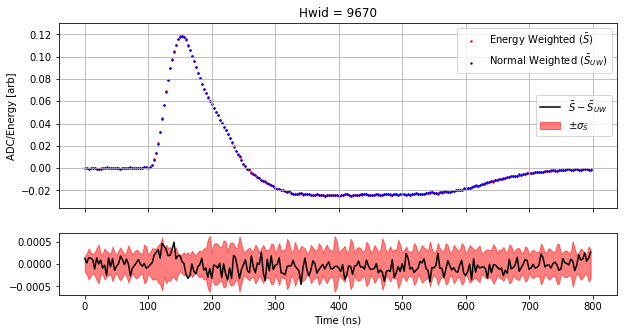

In [9]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10,5))
plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, file.keys()[1])
plt.show()

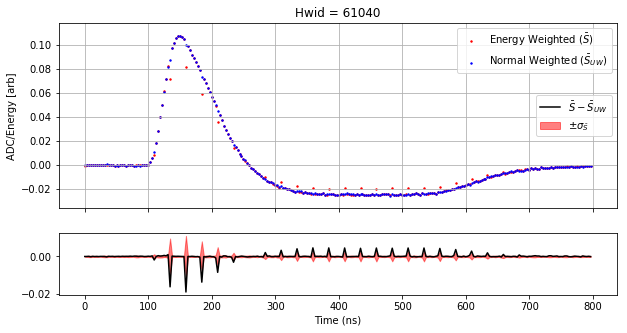

In [10]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10,5))
plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, file.keys()[2])
plt.show()

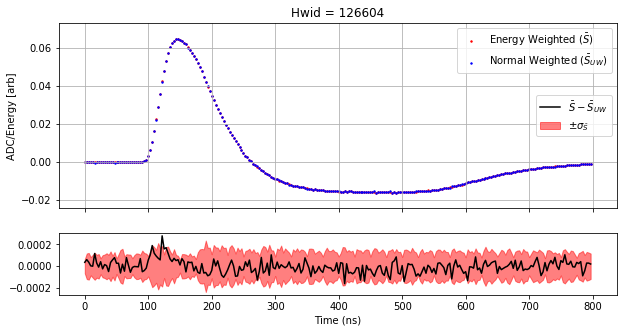

In [11]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, figsize=(10,5))
plotter_macro_comp(ax, plotting_dfs, plotting_dfs_uw, file.keys()[3])
plt.show()

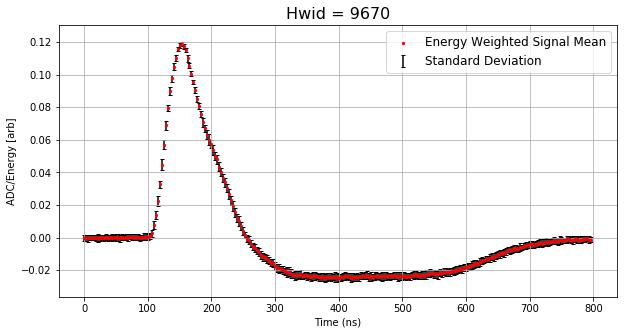

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
plotter_macro(ax, plotting_dfs, file.keys()[1])

plt.savefig('test.png', dpi=200)
plt.show()

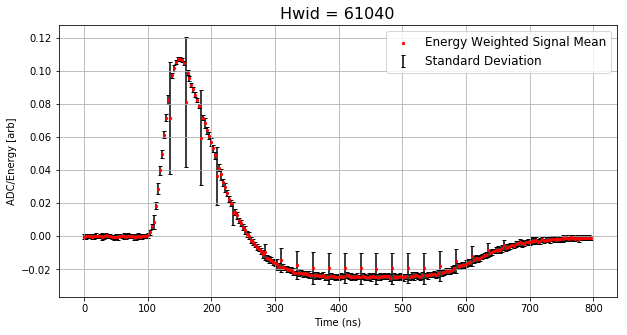

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plotter_macro(ax, plotting_dfs, file.keys()[2])
plt.show()

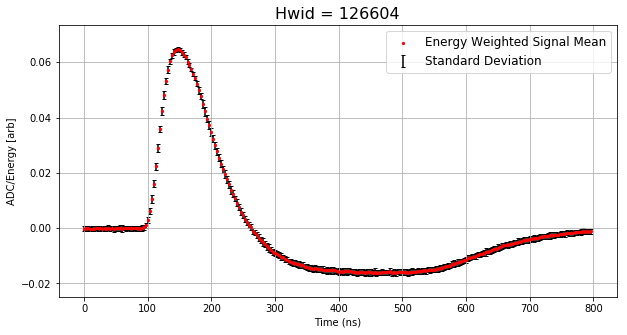

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
plotter_macro(ax, plotting_dfs, file.keys()[3])
plt.show()

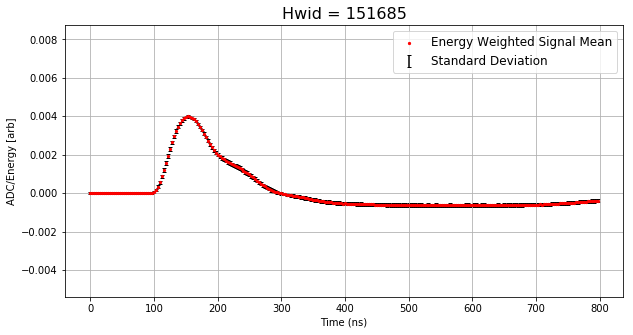

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plotter_macro(ax, plotting_dfs, file.keys()[4])
plt.show()